# [FinalExam]-[MATH6149016 ; MATH6149049 ]-[MachineLearning]

**Thursday, July 14, 2022.**

**Student Name**  : Patrick Jonathan   
**Student ID**    : 2440064791     
**Video Link**    : https://youtu.be/gAoMtGBF8S8

* [Dataset Link](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data)
## <strong>Dataset Description</strong>
<br>
 <strong>a record of the crimes that have occurred in Chicago</strong>
 <br>
<ul><li><strong>Domestic :</strong> Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.</li>
    <li><strong>Beat :</strong> Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts.</li>
    <li><strong>District :</strong> Indicates the police district where the incident occurred</li>
    <li><strong>Ward :</strong> The ward(City Council District) where the incident occurred</li>
    <li><strong>Community Are :</strong> Indicates the community area where the incident occurred. Chicago has 77 community areas.</li>
    <li><strong>FBI Code :</strong> Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).</li>
    <li><strong>Date :</strong> A given month (1 : January, 12 : December); a given hour (1 to 23)</li>
</ul>

**NOTES:**
<li>You are required to build <strong>'the BEST and suitable'</strong> supervised machine learning model for the given dataset. The model may be used for the effective deployment of police officers in a city across several districts regarding the degree to which each area is prone to crime at a particular hour, day, and month. </li>
<li>Build multiple potentially suitable machine learning models (at least 2 different machine learning models).</li>
<li>You have to evaluate the models using at least 2 performance metrics before choose what you assume to be the `"best"` model for the given dataset.</li>

**HINT:** 
1. You need to generate the target feature by **performing feature engineering on `Date` and `Primary Type` features** to group crimes together
<br>
2. Level of Crime Rate:
<ul><li><strong>0-14 : </strong>Low Crime Rate</li>
<li><strong>15-33 : </strong>Medium Crime Rate</li>
<li><strong>34 and above : </strong>High Crime Rate</li>
<br>
3. You may need to check the data proportion in each class (imbalance/not)

## 1. Load the neccessary Libraries and Data (2 pts.)

In [1]:
import pandas as pd

Import library pandas to call the read_csv method

Because read_csv method included in pandas library.

In [2]:
df = pd.read_csv("OddID.csv")

Read the "OddID.csv" file using **read_csv** method and keep it in df variable

In [3]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,1024161,11254362,JB183495,03/12/2018 07:32:00 PM,017XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,RESTAURANT,False,...,1.0,24.0,08A,1164432.0,1905388.0,2018,05/04/2018 03:51:04 PM,41.896002,-87.671521,"(41.896002063, -87.671521286)"
1,428801,10540177,HZ285387,05/29/2016 11:28:00 PM,027XX S STATE ST,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,CHA APARTMENT,True,...,3.0,35.0,08B,1176730.0,1886544.0,2016,02/10/2018 03:50:01 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)"
2,1099812,11624449,JC187320,03/16/2019 02:10:00 AM,101XX S PRINCETON AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,...,9.0,49.0,03,1176072.0,1837879.0,2019,03/23/2019 04:03:16 PM,41.710497,-87.630797,"(41.710496583, -87.630796959)"
3,595228,11109388,JA459177,10/05/2017 11:00:00 AM,019XX W OGDEN AVE,0810,THEFT,OVER $500,HOSPITAL BUILDING/GROUNDS,False,...,2.0,28.0,06,1163312.0,1897077.0,2017,02/10/2018 03:50:01 PM,41.873220,-87.675869,"(41.873219626, -87.675868666)"
4,1033611,11241624,JB166623,02/26/2018 07:51:00 PM,067XX S COTTAGE GROVE AVE,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,...,20.0,42.0,26,1182717.0,1860597.0,2018,05/04/2018 03:51:04 PM,41.772686,-87.605758,"(41.77268594, -87.605758495)"


Check if the data is imported successly using `head` method to see the top 5 of the dataset

## 2. Data Exploration (15 pts.)

In [4]:
df.shape

(1031744, 23)

By using `shape` method, we can see that our imported dataset have 1031744 rows and 23 columns

It means that our dataset has 23 attributes with 1031744 data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031744 entries, 0 to 1031743
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1031744 non-null  int64  
 1   ID                    1031744 non-null  int64  
 2   Case Number           1031744 non-null  object 
 3   Date                  1031744 non-null  object 
 4   Block                 1031744 non-null  object 
 5   IUCR                  1031744 non-null  object 
 6   Primary Type          1031744 non-null  object 
 7   Description           1031744 non-null  object 
 8   Location Description  1028477 non-null  object 
 9   Arrest                1031744 non-null  bool   
 10  Domestic              1031744 non-null  bool   
 11  Beat                  1031744 non-null  int64  
 12  District              1031743 non-null  float64
 13  Ward                  1031738 non-null  float64
 14  Community Area        1031742 non-

### Type of attributes

As we can see from the table above, from the 23 attributes that we have : 
- 2 boolean attributes 
- 10 categorical attributes
- 11 numerical attributes

In [6]:
df.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.031744e+06,1.031744e+06,1.031744e+06,1.031743e+06,1.031738e+06,1.031742e+06,1.019181e+06,1.019181e+06,1.031744e+06,1.019181e+06,1.019181e+06
mean,5.734502e+05,1.081694e+07,1.144468e+03,1.121607e+01,2.316172e+01,3.686135e+01,1.164729e+06,1.886285e+06,2.016676e+03,4.184356e+01,-8.767101e+01
std,3.308943e+05,7.250323e+05,6.942233e+02,6.934780e+00,1.398308e+01,2.141199e+01,1.622861e+04,3.118423e+04,1.248647e+00,8.576025e-02,5.908040e-02
min,0.000000e+00,2.171400e+04,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,1.092706e+06,1.813897e+06,2.015000e+03,4.164459e+01,-8.793427e+01
25%,2.869228e+05,1.040797e+07,6.120000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152955e+06,1.859226e+06,2.016000e+03,4.176901e+01,-8.771377e+01
50%,5.737245e+05,1.087063e+07,1.031000e+03,1.000000e+01,2.400000e+01,3.200000e+01,1.166471e+06,1.893489e+06,2.017000e+03,4.186338e+01,-8.766459e+01
75%,8.598735e+05,1.127863e+07,1.713000e+03,1.700000e+01,3.400000e+01,5.400000e+01,1.176417e+06,1.908739e+06,2.018000e+03,4.190535e+01,-8.762788e+01
max,1.146380e+06,1.168250e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951535e+06,2.019000e+03,4.202267e+01,-8.752453e+01


By using `describe` method, we can see the rows of each attributes, mean, standard deviation, minimum values, maximum values, and persentiles of each columns.

### Distribution

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Import matplotlib.pyplot library to use `hist` method

We use `hist` method to show or visualize histogram of the numerical attributes

<function matplotlib.pyplot.show(*args, **kw)>

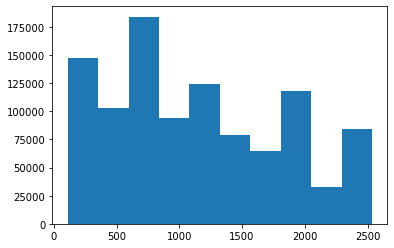

In [8]:
plt.hist(df['Beat'])
plt.show

C:\Users\Patrick Jonathan\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Patrick Jonathan\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show(*args, **kw)>

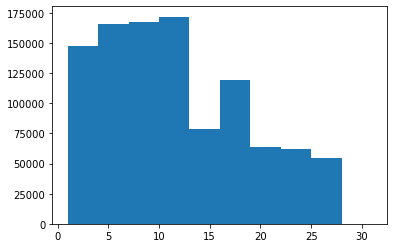

In [9]:
plt.hist(df['District'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

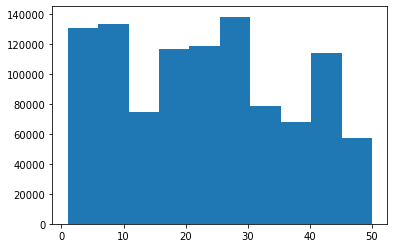

In [10]:
plt.hist(df['Ward'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

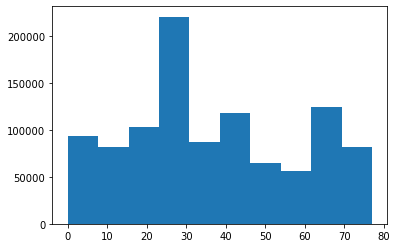

In [11]:
plt.hist(df['Community Area'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

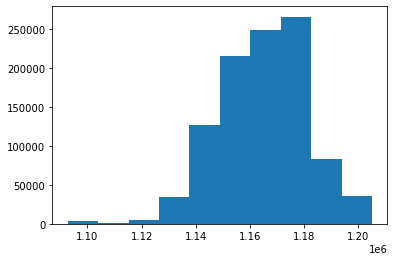

In [12]:
plt.hist(df['X Coordinate'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

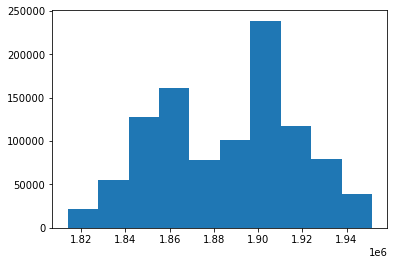

In [13]:
plt.hist(df['Y Coordinate'])
plt.show

Next we use countplot to visualize the categorical attributes

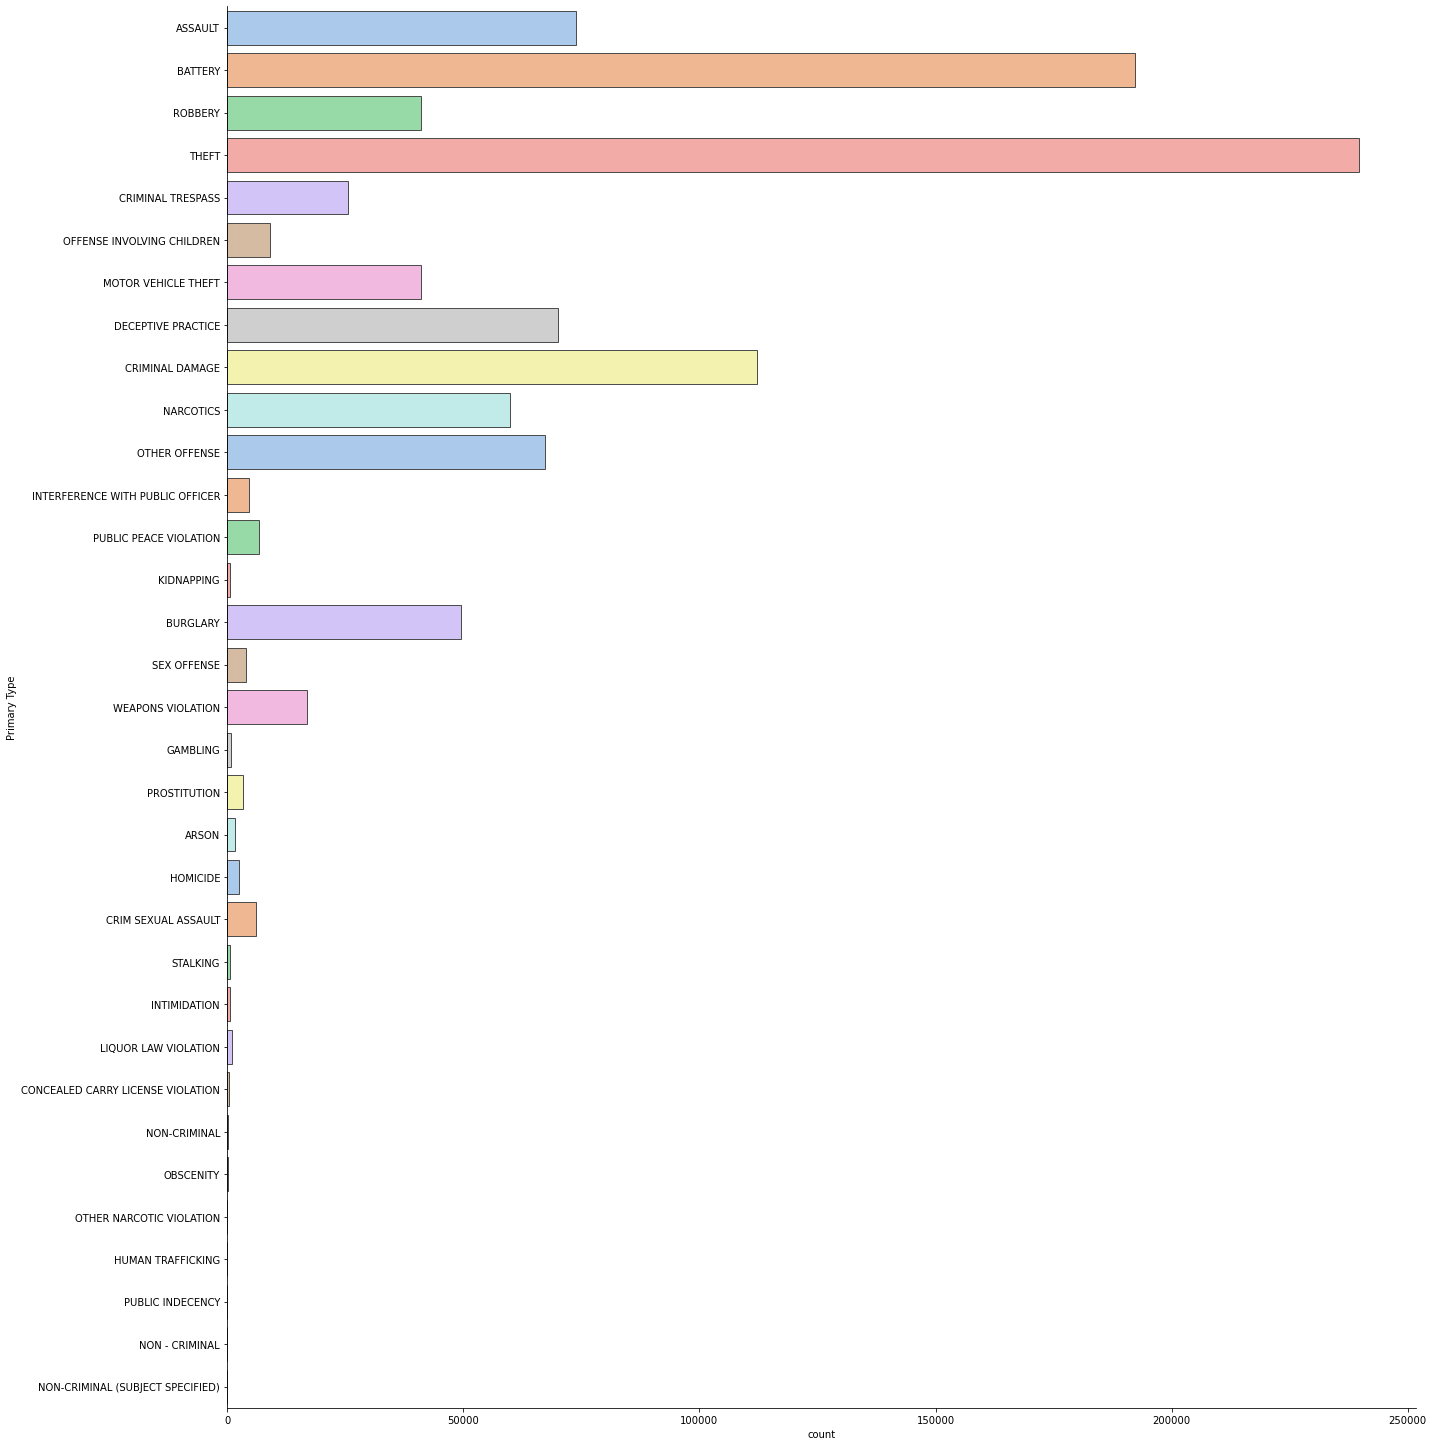

In [14]:
sns.catplot(y="Primary Type", kind="count",
            palette="pastel", edgecolor="0.3",
            data=df, height = 20)

As we can see from the barplot above, that the most of the criminal acts that occur are `Theft`, followed by `Battery`, and `Criminal Damage`

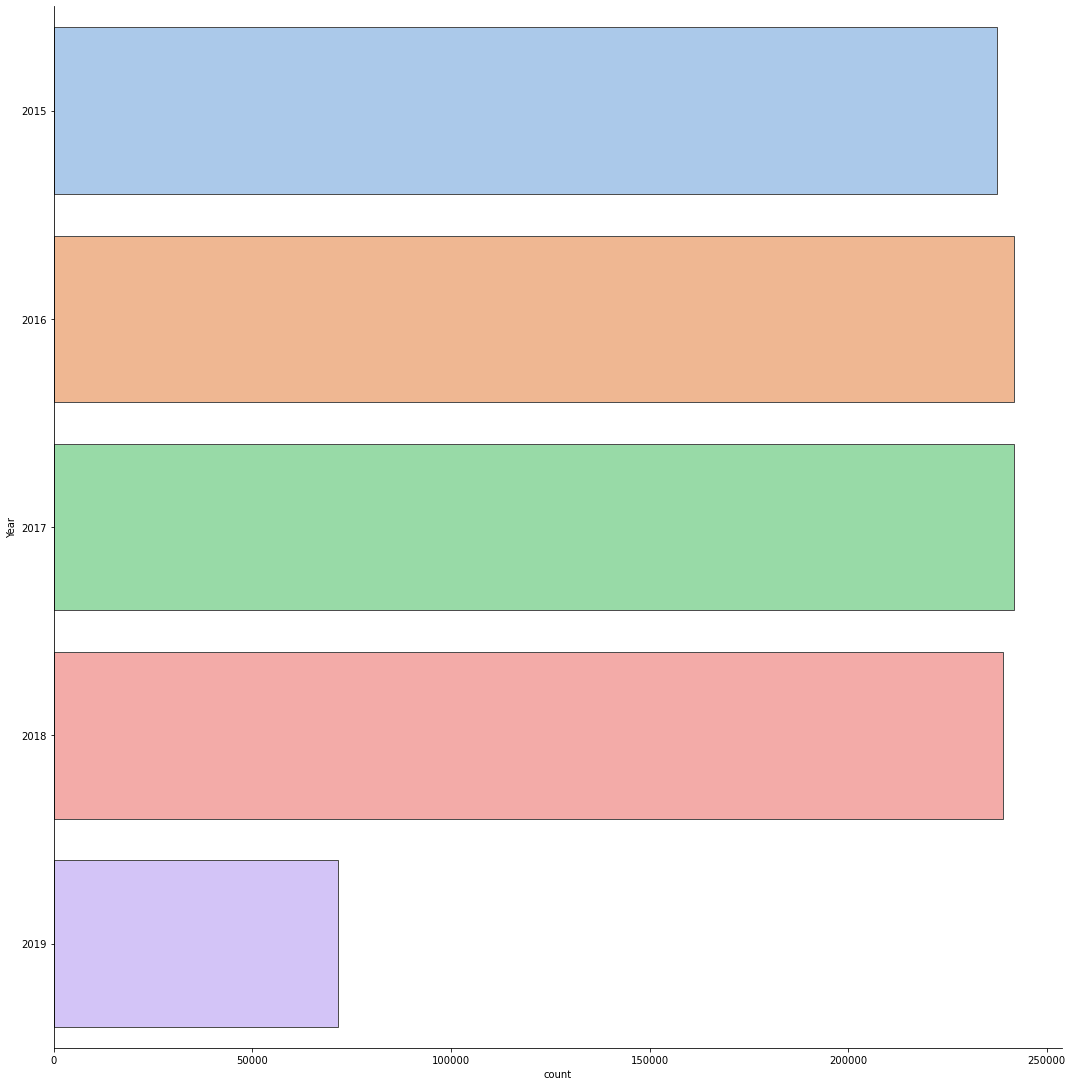

In [15]:
sns.catplot(y="Year", kind="count",
            palette="pastel", edgecolor="0.3",
            data=df, height = 15)

As we can see from the barplot above, that the most of the criminal acts occur in `2016` and `2017`

### Checking Missing Values

In [16]:
df.isna().sum()

Unnamed: 0                  0
ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     3267
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                        6
Community Area              2
FBI Code                    0
X Coordinate            12563
Y Coordinate            12563
Year                        0
Updated On                  0
Latitude                12563
Longitude               12563
Location                12563
dtype: int64

We can check whether the dataset has missing values or no, by using `isna()` method.

As we can see, that some attributes has missing values : 
- Location Description : 3267
- District : 1
- Ward : 6
- Community Area : 2
- X Coordinate : 12563
- Y Coordinate : 12563
- Latitude : 12563
- Longitude : 12563
- Location : 12563

We can see the percentage of the missing values by dividing the missing values of each attribute by 1031744 (total data) and multiply by 100

In [17]:
missingValuesPercentage = (df.isna().sum() / len(df)) * 100

In [18]:
missingValuesPercentage

Unnamed: 0              0.000000
ID                      0.000000
Case Number             0.000000
Date                    0.000000
Block                   0.000000
IUCR                    0.000000
Primary Type            0.000000
Description             0.000000
Location Description    0.316648
Arrest                  0.000000
Domestic                0.000000
Beat                    0.000000
District                0.000097
Ward                    0.000582
Community Area          0.000194
FBI Code                0.000000
X Coordinate            1.217647
Y Coordinate            1.217647
Year                    0.000000
Updated On              0.000000
Latitude                1.217647
Longitude               1.217647
Location                1.217647
dtype: float64

So, here are the percentage of each missing value : 

- Location Description : 0.316648 %
- District : 0.000097 %
- Ward : 0.000582 %
- Community Area : 0.000194 %
- X Coordinate : 1.217647 %
- Y Coordinate : 1.217647 %
- Latitude : 1.217647 %
- Longitude : 1.217647 %
- Location : 1.217647 %

We can remove the missing value later, so that our data is clean from missing value.

### Correlation

We can see the correlation between attributes using `corr` method

In [19]:
df.corr()

,Unnamed: 0,ID,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
Unnamed: 0,1.000000,0.619242,-0.038335,0.009086,-0.002889,-0.002882,0.014496,-0.015820,0.012545,0.008968,0.972282,0.008901,0.012798
ID,0.619242,1.000000,-0.047438,0.011389,0.005324,0.005378,0.020361,-0.024534,0.010323,0.021032,0.668731,0.020947,0.010740
Arrest,-0.038335,-0.047438,1.000000,-0.035033,-0.031986,-0.032082,-0.023560,0.034056,-0.028767,-0.040441,-0.045000,-0.040240,-0.029623
Domestic,0.009086,0.011389,-0.035033,1.000000,-0.054418,-0.054452,-0.081570,0.096904,0.017577,-0.111847,0.007442,-0.111680,0.015962
Beat,-0.002889,0.005324,-0.031986,-0.054418,1.000000,0.999723,0.659778,-0.485325,-0.547681,0.624609,-0.002826,0.625438,-0.542703
District,-0.002882,0.005378,-0.032082,-0.054452,0.999723,1.000000,0.661105,-0.485908,-0.548559,0.625830,-0.002817,0.626660,-0.543568
Ward,0.014496,0.020361,-0.023560,-0.081570,0.659778,0.661105,1.000000,-0.533907,-0.438736,0.656941,0.016120,0.657259,-0.432346
Community Area,-0.015820,-0.024534,0.034056,0.096904,-0.485325,-0.485908,-0.533907,1.000000,0.243417,-0.775952,-0.018341,-0.775239,0.233717
X Coordinate,0.012545,0.010323,-0.028767,0.017577,-0.547681,-0.548559,-0.438736,0.243417,1.000000,-0.546065,0.014228,-0.548815,0.999918
Y Coordinate,0.008968,0.021032,-0.040441,-0.111847,0.624609,0.625830,0.656941,-0.775952,-0.546065,1.000000,0.010902,0.999995,-0.535363


To visualize it, we can also use heatmap, so it is easier for us to give a analysis or conclusion using `heatmap` method in seaborn library

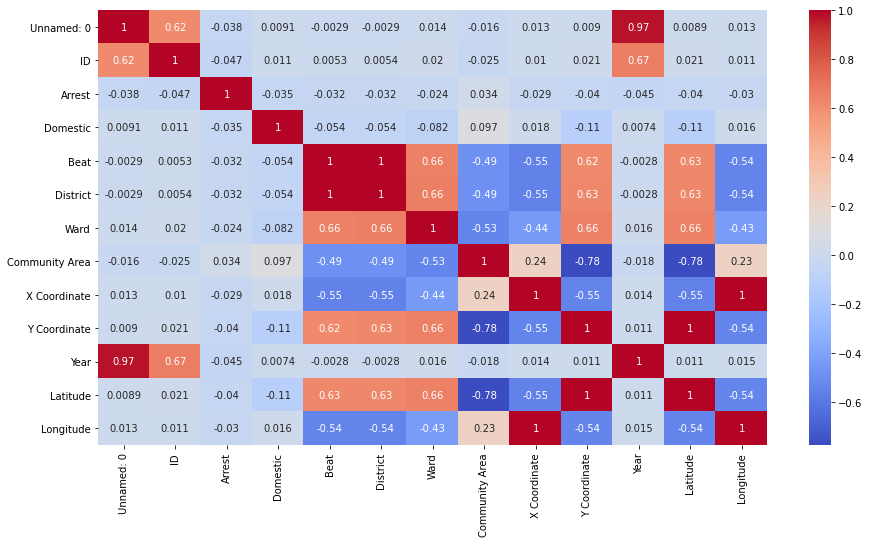

In [20]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

The closer the correlation value to 1 or -1, the stronger the correlation between the two attributes
The closer the correlation value to 0, the weaker the correlation between the two attributes

As we can see in heatmap, Correlation between `X Coordinate` and `Longitude` is **1** because they have the same value.

On the other side, Correlation between `Domestic` and `ID` have the lowest correlation value which is **0.011** and so close to 0, which means that there is nearly no correlation between `Domestic` and `ID`

## 3. Data Preparation (30 pts.)

### Drop The Missing Value

We can just drop the missing value for each attributes using `dropna` method.

In [5]:
df = df.dropna()

In [6]:
df.isna().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

After we drop the missing values, we can see that the dataset have no more missing values. 

### Split the Date Attributes into Month, Day, and Hour

In [7]:
df['Date']

0          03/12/2018 07:32:00 PM
1          05/29/2016 11:28:00 PM
2          03/16/2019 02:10:00 AM
3          10/05/2017 11:00:00 AM
4          02/26/2018 07:51:00 PM
                    ...          
1031739    12/19/2017 08:10:00 PM
1031740    03/16/2017 01:00:00 PM
1031741    07/18/2015 09:30:00 PM
1031742    07/17/2018 10:56:00 PM
1031743    09/21/2016 01:10:00 PM
Name: Date, Length: 1016837, dtype: object

Here I make a define function to Re-format the Date variables. So that we can split it into Month, Day, and Hour later

In [8]:
from datetime import datetime

def convertDateFormat(dates):
    month = dates[:2]
    date = dates[3:5]
    year = dates[6:10]
    hour = dates[11:13]
    minutes = dates[14:16]
    second = dates[17:19]
    meridiem = dates[20:22]
    
    if(meridiem == 'AM'):
        if(int(hour) == 12):
            hour = '00'
    else :
        if(int(hour) != 12):
            hour = str(int(hour) + 12)

    Dformat = datetime(int(year), int(month), int(date), int(hour), int(minutes), int(second))
    return Dformat

In [9]:
df['Date'] = df['Date'].apply(convertDateFormat)

In [10]:
df['Date']

0         2018-03-12 19:32:00
1         2016-05-29 23:28:00
2         2019-03-16 02:10:00
3         2017-10-05 11:00:00
4         2018-02-26 19:51:00
                  ...        
1031739   2017-12-19 20:10:00
1031740   2017-03-16 13:00:00
1031741   2015-07-18 21:30:00
1031742   2018-07-17 22:56:00
1031743   2016-09-21 13:10:00
Name: Date, Length: 1016837, dtype: datetime64[ns]

After we have already re-format the date, I make some function to split the Month, Day, and Hour

In [11]:
def splitMonth(x):
    return int(x.strftime("%m"))

def splitDay(x):
    return int(x.strftime("%w"))

def splitHour(x):
    return int(x.strftime("%H"))

Apply the function to the date variables that we have already re-format, and add the variables `Month`, `Day`, and `Hour` to the dataframes

In [12]:
df['Month'] = df['Date'].apply(splitMonth)
df['Day'] = df['Date'].apply(splitDay)
df['Hour'] = df['Date'].apply(splitHour)

In [13]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
0,1024161,11254362,JB183495,2018-03-12 19:32:00,017XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,RESTAURANT,False,...,1164432.0,1905388.0,2018,05/04/2018 03:51:04 PM,41.896002,-87.671521,"(41.896002063, -87.671521286)",3,1,19
1,428801,10540177,HZ285387,2016-05-29 23:28:00,027XX S STATE ST,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,CHA APARTMENT,True,...,1176730.0,1886544.0,2016,02/10/2018 03:50:01 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)",5,0,23
2,1099812,11624449,JC187320,2019-03-16 02:10:00,101XX S PRINCETON AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,...,1176072.0,1837879.0,2019,03/23/2019 04:03:16 PM,41.710497,-87.630797,"(41.710496583, -87.630796959)",3,6,2
3,595228,11109388,JA459177,2017-10-05 11:00:00,019XX W OGDEN AVE,0810,THEFT,OVER $500,HOSPITAL BUILDING/GROUNDS,False,...,1163312.0,1897077.0,2017,02/10/2018 03:50:01 PM,41.873220,-87.675869,"(41.873219626, -87.675868666)",10,4,11
4,1033611,11241624,JB166623,2018-02-26 19:51:00,067XX S COTTAGE GROVE AVE,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,...,1182717.0,1860597.0,2018,05/04/2018 03:51:04 PM,41.772686,-87.605758,"(41.77268594, -87.605758495)",2,1,19


Here we can see that the variables have already added to the dataframes

Here are the description of each variables : 
- Month : ranging from 1 - 12 where 1 = January and 12 = December
- Day : ranging from 0 - 6 where 0 = Sunday and 6 = Saturday 
- Hour : ranging from 0 - 23 

### Feature Engineering

Take the `Month`, `Day`, `Hour`, `Primary Type`, and `District` to determine the Crime rate by counting the total crimes in particular hour, day, month, and district

In [14]:
df1 = df[['Month', 'Day', 'Hour', 'District', 'Primary Type']]

In [15]:
df1.head()

,Month,Day,Hour,District,Primary Type
0,3,1,19,12.0,ASSAULT
1,5,0,23,1.0,BATTERY
2,3,6,2,5.0,ROBBERY
3,10,4,11,12.0,THEFT
4,2,1,19,3.0,CRIMINAL TRESPASS


Here I use groupby function and aggregate it with the counts of the total crimes for particular hour, day, month, and district

In [16]:
df1 = df1.groupby(['Month', 'Day', 'Hour', 'District'], as_index=False).agg({"Primary Type":"count"})

In [17]:
df1.head()

,Month,Day,Hour,District,Primary Type
0,1,0,0,1.0,22
1,1,0,0,2.0,31
2,1,0,0,3.0,36
3,1,0,0,4.0,38
4,1,0,0,5.0,28


Here we got the total counts for each particular hour, day, month, and district

We can read the first row as, In January on Sunday at 00.00 AM in District 1, there are 22 crimes that occur

Next we classify the total crimes by using this define function as follows, where :
<ul><li><strong>0-14 : </strong>Low Crime Rate (0)</li>
<li><strong>15-33 : </strong>Medium Crime Rate (1)</li>
<li><strong>34 and above : </strong>High Crime Rate (2)</li>

In [18]:
def crimeRate(x):
    if(x <= 14):
        return 0
    elif(x > 14 and x <= 33):
        return 1
    else:
        return 2

Then, we apply the function to the `Primary Type`

In [19]:
df1['Crime Rate'] = df1['Primary Type'].apply(crimeRate)

In [20]:
df1.head()

,Month,Day,Hour,District,Primary Type,Crime Rate
0,1,0,0,1.0,22,1
1,1,0,0,2.0,31,1
2,1,0,0,3.0,36,2
3,1,0,0,4.0,38,2
4,1,0,0,5.0,28,1


Next we want to see the data proportion of each class

In [21]:
df1['Crime Rate'].value_counts() * 100 / len(df1)

1    51.026895
0    29.206213
2    19.766891
Name: Crime Rate, dtype: float64

As we can see from the table above, that the proportion of each class is imbalance 

Next, we prepare the data for the modeling 

In [22]:
x = df1[['Month', 'Day', 'Hour', 'District', 'Primary Type']]
y = df1['Crime Rate']

First, we define x as `Month`, `Day`, `Hour`, and `District` because there is a note that mention the model may be used for the effective deployment of police officers in a city across several districts regarding the degree to which each area is prone to crime at a particular hour, day, and month. And we define y variable as the `Crime Rate` because we want to use classify the Crime Rate by using the x variables.

Then, we split the dataset into train model and test model

We can use `train_test_split` method that sklearn library provides to split the dataset. Here I use the 8:2 ratio to split the data. So 80% data for train model and 20% data for test model.

I also set the random_state to 42 so that the data doesn't randomized again and again if we want to rerun the code.

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(35485, 5) (35485,) (8872, 5) (8872,)


As we can see, that the data was split into 35486 data (80%) for the train model and 8872 data (20%) for the test model

We can also use `StandardScaler` method from sklearn library to normalize the data so that the data we used, doesn't have large deviations

Here, I normalize the `x_train` and `x_test` variable

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## 4. Build and Assess the machine learning models (35 pts.)

**You have to evaluate the machine learning models using at least two performance metrics (for example: precision and recall)**. 

Here I use 3 Classifier Model to test the accuracy :
- **Decision Tree Classifier**
- **Random Forest Classifier**
- **K Nearest Neighbour**

First we import the library that will be used to do the Classifier Model

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### First Model : Decision Tree Classifier

First, we defined the `DecisionTreeClassifier` method into `dtc` variable

Then, we fit the model using `x_train` and `y_train` variable

Last, we can see the accuracy for the Decision Tree Classifier model by testing the model using `x_test` and `y_test` variable

In [26]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
yPredDTC = dtc.predict(x_test)
print("Decision Tree Classifier Accuracy is:", dtc.score(x_test, y_test) * 100, "%")

Decision Tree Classifier Accuracy is: 100.0 %


### Second Model : Random Forest Classifier

First, we defined the `RandomForestClassifier` method into `rfc` variable

Then, we fit the model using `x_train` and `y_train` variable

Last, we can see the accuracy for the Random Forest Classifier model by testing the model using `x_test` and `y_test` variable

In [27]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
yPredRFC = rfc.predict(x_test)
print("Random Forest Classifier Accuracy is:", rfc.score(x_test, y_test) * 100, "%")

Random Forest Classifier Accuracy is: 100.0 %


### Third Model : K Nearest Neighbour

First, we defined the `KNeighborsClassifier` method into `knn` variable

Then, we fit the model using `x_train` and `y_train` variable

Last, we can see the accuracy for the K Nearest Neighbour model by testing the model using `x_test` and `y_test` variable

In [28]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
yPredKNN = knn.predict(x_test)
print("K Nearest Neighbour Accuracy is:", knn.score(x_test, y_test) * 100, "%")

K Nearest Neighbour Accuracy is: 95.28854824165916 %


## 5. Choose your Final Model (3 pts.)

**You finally have your final model. Write comments to justify your final model**

Import the library needed to compare each Model

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Now, we compare each model by using accuracy score, confusion matrix and the classification report

### Decision Tree Classifier

In [30]:
acs = accuracy_score(yPredDTC, y_test)
print(acs)

1.0


In [31]:
cfm = confusion_matrix(yPredDTC, y_test)
print(cfm)

[[2555    0    0]
 [   0 4516    0]
 [   0    0 1801]]


In [32]:
cr = classification_report(yPredDTC, y_test)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2555
           1       1.00      1.00      1.00      4516
           2       1.00      1.00      1.00      1801

    accuracy                           1.00      8872
   macro avg       1.00      1.00      1.00      8872
weighted avg       1.00      1.00      1.00      8872



### Random Forest Classifier

In [33]:
acs = accuracy_score(yPredRFC, y_test)
print(acs)

1.0


In [34]:
cfm = confusion_matrix(yPredRFC, y_test)
print(cfm)

[[2555    0    0]
 [   0 4516    0]
 [   0    0 1801]]


In [35]:
cr = classification_report(yPredRFC, y_test)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2555
           1       1.00      1.00      1.00      4516
           2       1.00      1.00      1.00      1801

    accuracy                           1.00      8872
   macro avg       1.00      1.00      1.00      8872
weighted avg       1.00      1.00      1.00      8872



### K Nearest Neighbour

In [36]:
acs = accuracy_score(yPredKNN, y_test)
print(acs)

0.9528854824165915


In [37]:
cfm = confusion_matrix(yPredKNN, y_test)
print(cfm)

[[2446  109    0]
 [ 109 4341  134]
 [   0   66 1667]]


In [38]:
cr = classification_report(yPredKNN, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2555
           1       0.96      0.95      0.95      4584
           2       0.93      0.96      0.94      1733

    accuracy                           0.95      8872
   macro avg       0.95      0.96      0.95      8872
weighted avg       0.95      0.95      0.95      8872



As we can see, by comparing the accuracy score, confusion matrix, and the classification report, we can see that **Random Forest Classifier** excels the other classifier from the accuracy score, precision rate, recall rate, and f1-score.

So, I choose **Random Forest Classifier** as my final model to do the dataset